# YOLOv8 ile Nesne Tespiti (Dur ve Yaya Geçidi)

Ad: Yusuf

Soyad: TUNÇ

Okul No: 2012721024

GitHub Repo Bağlantısı: https://github.com/ytunc4141/YoloV8_Nesne_Tespiti

Bu çalışma YOLOv8n modelinin eğitilmesini kapsar.

**Proje Adımları:**
1. Ortam kurulumu ve kütüphanelerin yüklenmesi.
2. Veri seti konfigürasyonunun (data.yaml) hazırlanması.
3. Modelin eğitilmesi (Training).
4. Performans metriklerinin (mAP, Loss) incelenmesi.
5. Eğitilen modelin test edilmesi.

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

!pip install ultralytics

from ultralytics import YOLO
from IPython.display import Image, display
import yaml

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Veri Seti Konfigürasyonu (data.yaml)

Modelin veri setini tanıması için gerekli konfigürasyon dosyası oluşturuluyor.
* **nc:** Sınıf sayısı (2 adet: dur, yaya_gecidi).
* **names:** Sınıf isimleri.
* **path:** Veri setinin ana dizini.

In [2]:
dataset_root_path = '/content/drive/MyDrive/Colab_Notebooks/YoloV8_Nesne_Tespiti/dataset'

data_yaml = {
    'path': dataset_root_path,
    'train': 'images/train',
    'val': 'images/val',
    'nc': 2,
    'names': ['dur', 'yaya_gecidi']
}

with open('/content/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print(f"data.yaml başarıyla oluşturuldu. Hedef yol: {dataset_root_path}")

data.yaml başarıyla oluşturuldu. Hedef yol: /content/drive/MyDrive/Colab_Notebooks/YoloV8_Nesne_Tespiti/dataset


## Model Eğitimi (Training)

YOLOv8 nano (yolov8n.pt) modeli kullanılarak eğitim başlatılır.
* **imgsz=640:** Görüntü boyutu standart 640px olarak ayarlanır.
* **epochs=100:** Veri seti küçük olduğu için modelin yakınsaması adına 100 epoch belirlenmiştir.
* **batch=16:** Donanım optimizasyonu için batch size 16 seçilmiştir.

In [3]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/data.yaml epochs=100 imgsz=640 plots=True

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

## Eğitim Sonuçları ve Metrikler

Eğitim tamamlandıktan sonra oluşan kayıp (loss) grafikleri ve doğruluk (mAP) değerleri aşağıdadır.
* **Box Loss:** Sınırlayıcı kutu hatası.
* **Cls Loss:** Sınıflandırma hatası.
* **mAP50-95:** Modelin genel başarım skoru.

Sonuçlar şu klasörden okunuyor: runs/detect/train


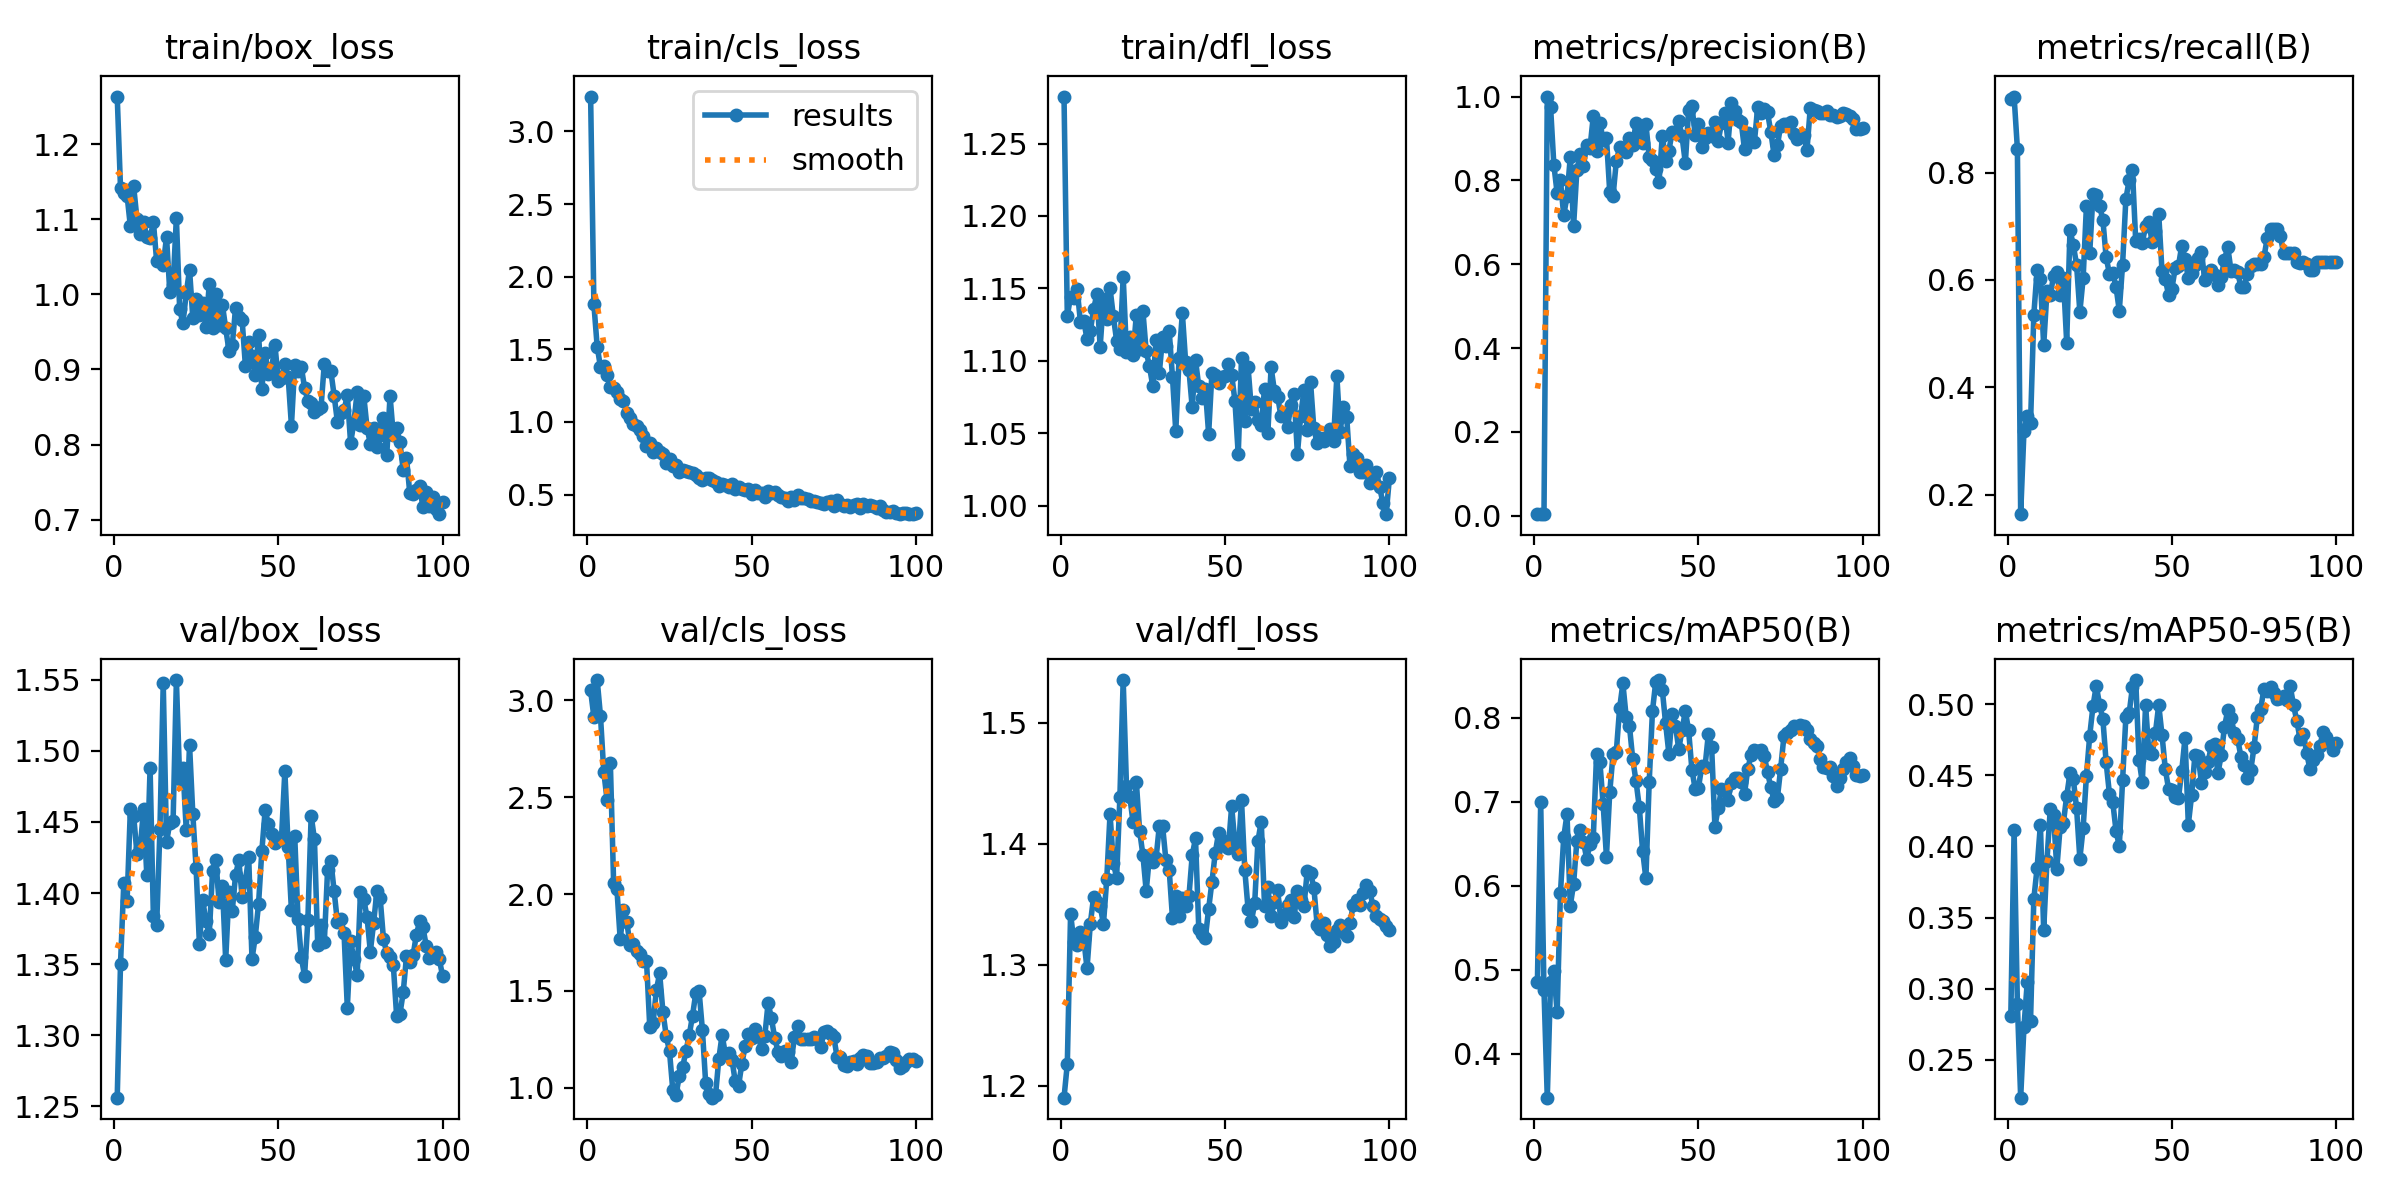

In [4]:
import glob

train_dirs = glob.glob('runs/detect/train*')
latest_train_dir = max(train_dirs, key=os.path.getmtime)
results_path = os.path.join(latest_train_dir, 'results.png')

print(f"Sonuçlar şu klasörden okunuyor: {latest_train_dir}")
display(Image(filename=results_path))

## Karışıklık Matrisi (Confusion Matrix)

Modelin hangi sınıfları ne kadar doğru tahmin ettiğini veya hangi sınıfları karıştırdığını gösterir.

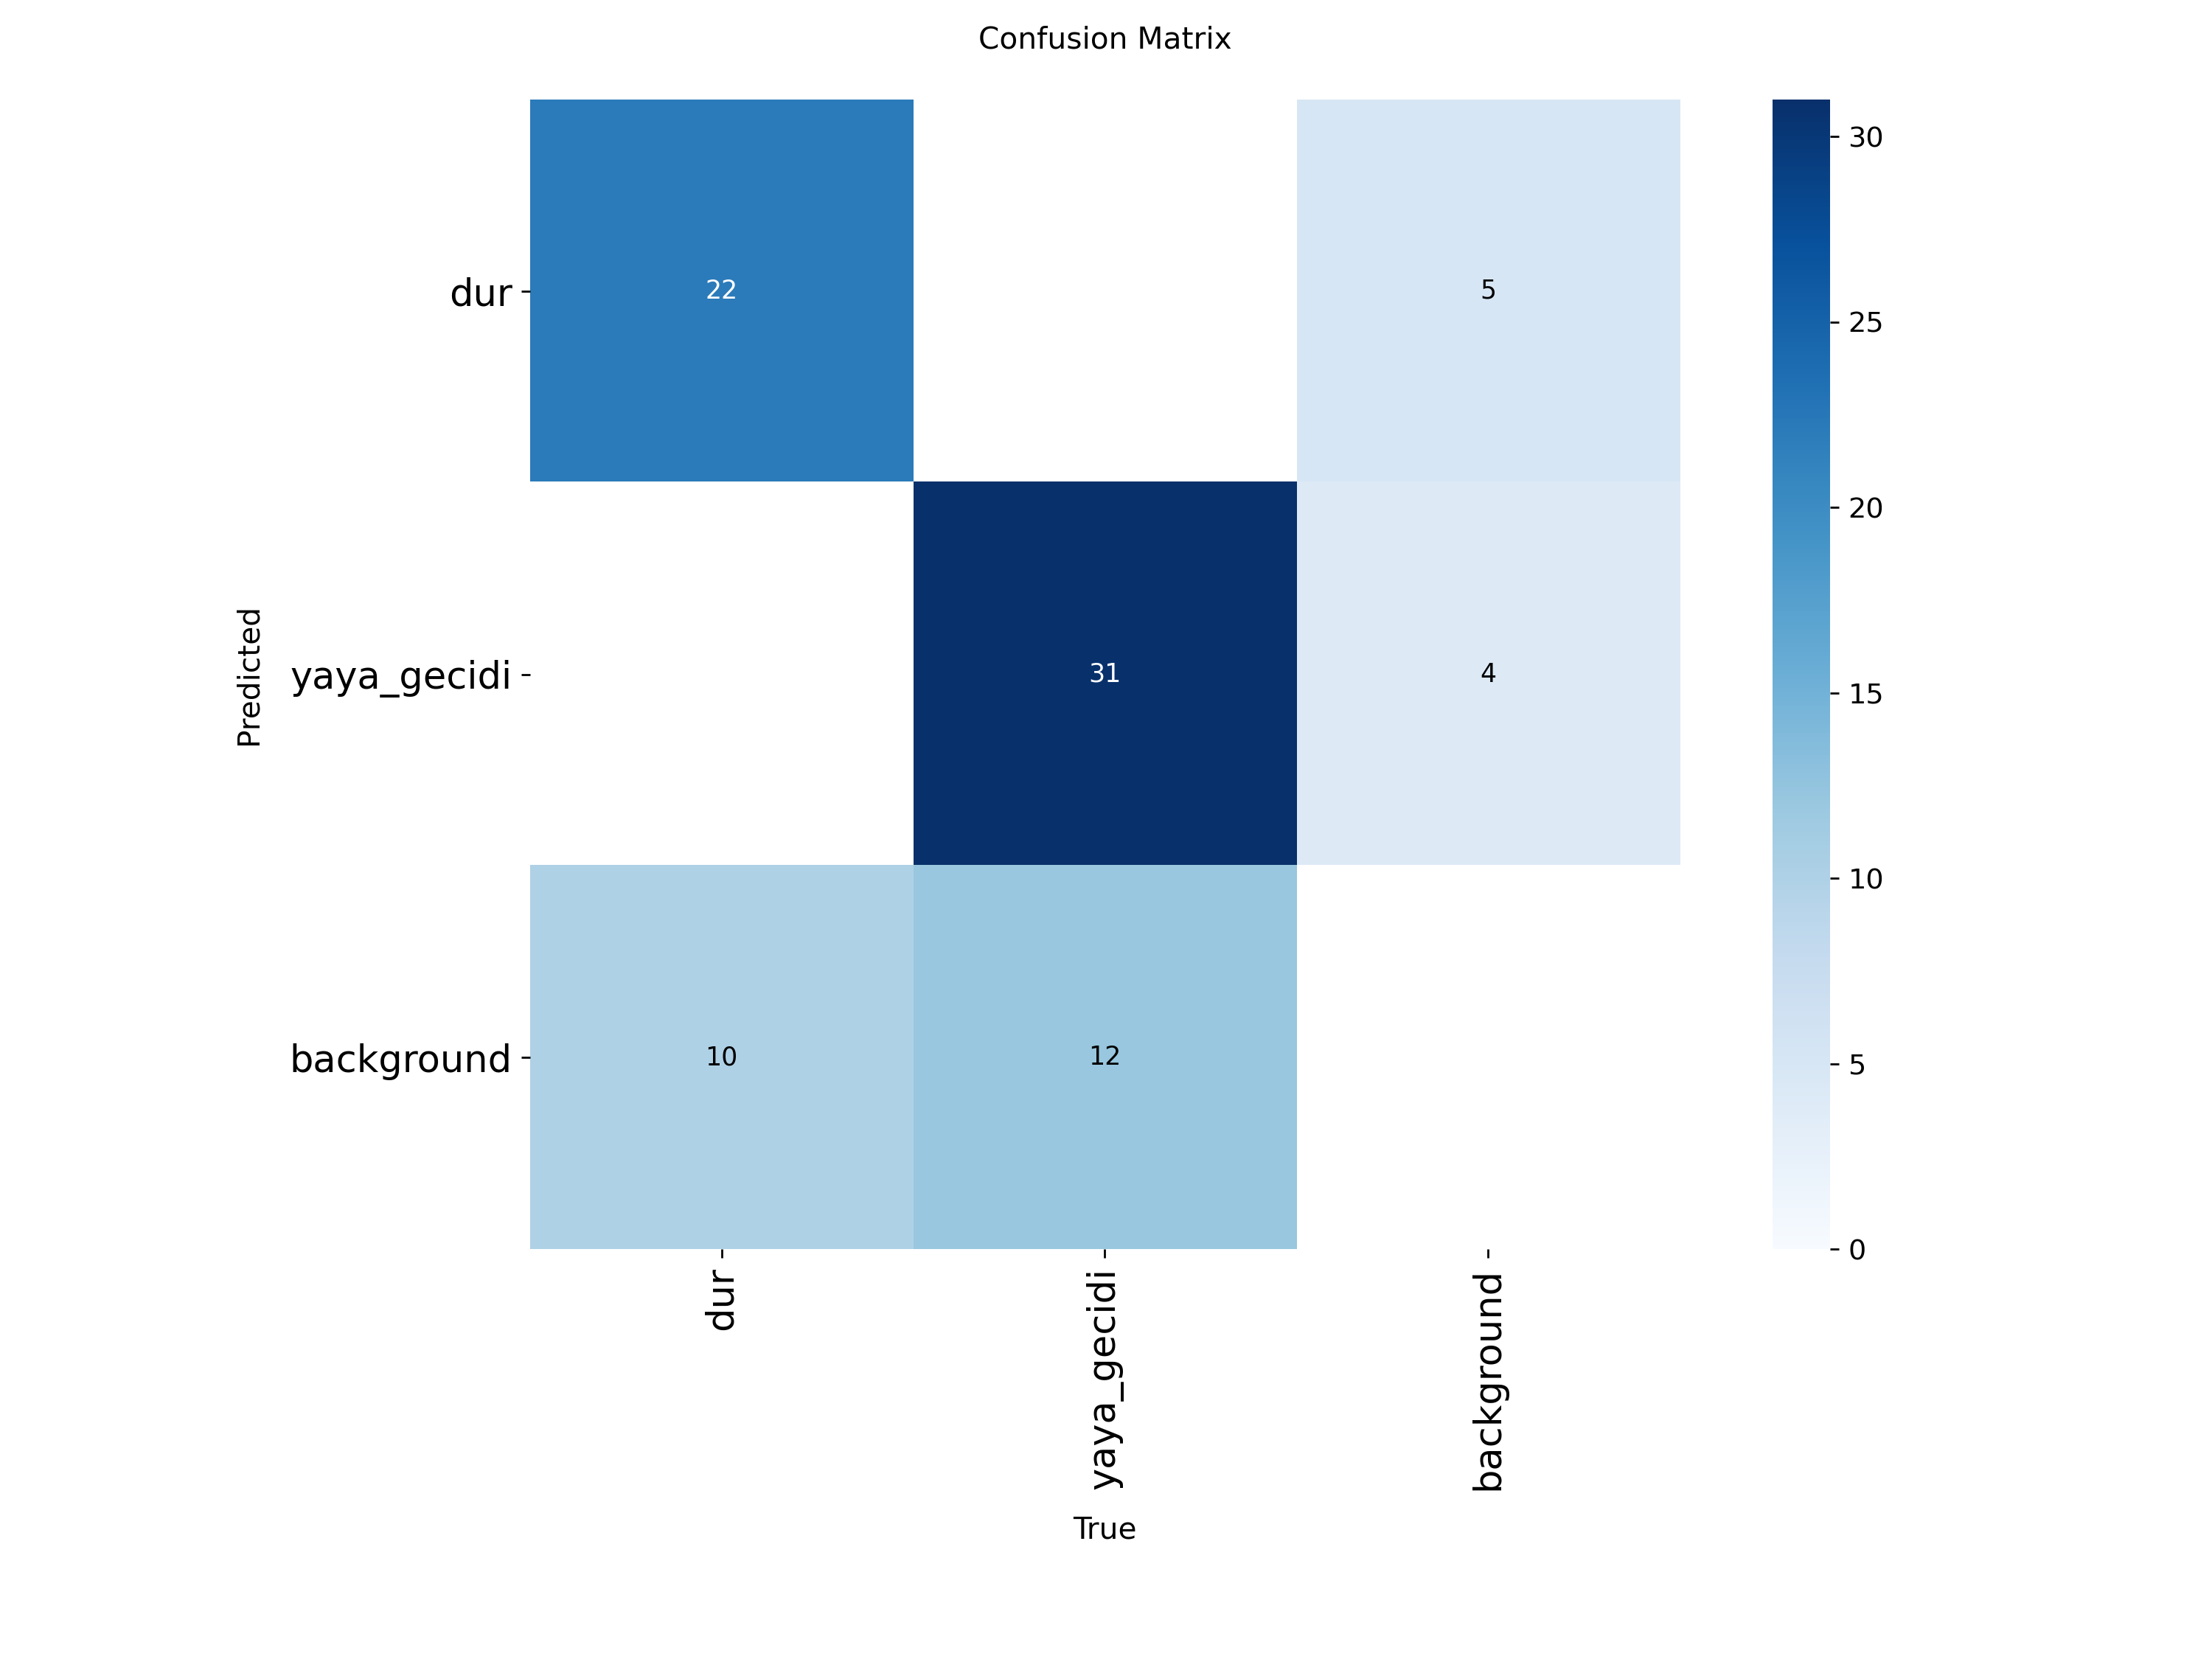

In [5]:
cm_path = os.path.join(latest_train_dir, 'confusion_matrix.png')
display(Image(filename=cm_path))

## Model Testi (Inference)

Eğitilen en iyi model (`best.pt`) kullanılarak, doğrulama (validation) setinden rastgele bir görsel üzerinde tahmin yürütülür.

İncelenen Görsel: 124.png

image 1/1 /content/drive/MyDrive/Colab_Notebooks/YoloV8_Nesne_Tespiti/dataset/images/val/124.png: 640x576 1 yaya_gecidi, 40.7ms
Speed: 3.8ms preprocess, 40.7ms inference, 16.4ms postprocess per image at shape (1, 3, 640, 576)
Results saved to /content/runs/detect/predict


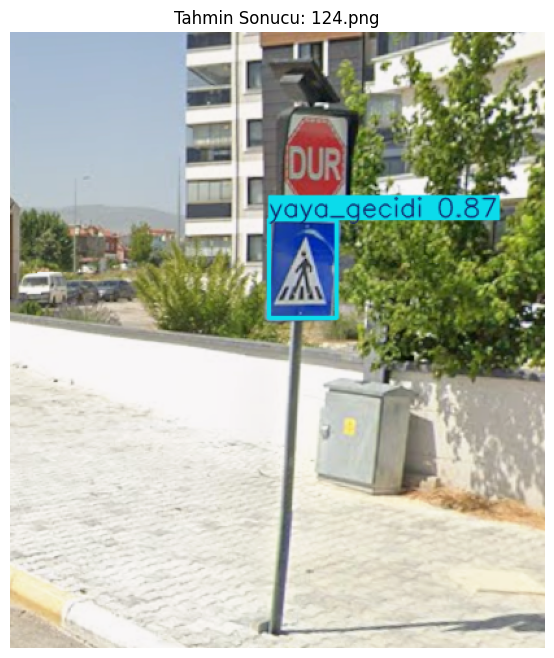

In [6]:
import matplotlib.pyplot as plt
import cv2
import os
import random

val_images_path = os.path.join(dataset_root_path, 'images/val')
random_image = random.choice(os.listdir(val_images_path))
img_path = os.path.join(val_images_path, random_image)

best_model_path = os.path.join(latest_train_dir, 'weights/best.pt')
model = YOLO(best_model_path)

print(f"İncelenen Görsel: {random_image}")
results = model.predict(source=img_path, save=True, conf=0.25)

res_plotted = results[0].plot()

res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(res_rgb)
plt.axis('off')
plt.title(f"Tahmin Sonucu: {random_image}")
plt.show()

## Modelin Kaydedilmesi

Eğitilen `best.pt` dosyası, masaüstü uygulamasında kullanılmak üzere Google Drive'a kopyalanır.

In [7]:
import shutil

destination_path = '/content/drive/MyDrive/Colab_Notebooks/YoloV8_Nesne_Tespiti/best.pt'

os.makedirs(os.path.dirname(destination_path), exist_ok=True)

shutil.copy(best_model_path, destination_path)
print(f"Model başarıyla şuraya yedeklendi: {destination_path}")

Model başarıyla şuraya yedeklendi: /content/drive/MyDrive/Colab_Notebooks/YoloV8_Nesne_Tespiti/best.pt
